<a href="https://colab.research.google.com/github/Dh-arch1923/My-Work/blob/main/EDA1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
Cardio=pd.read_csv('/content/Cardiotocographic.csv')
Cardio[0:4]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.0,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0


In [4]:
Cardio.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [5]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Checking the Null Values

In [6]:
Cardio.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


<Axes: >

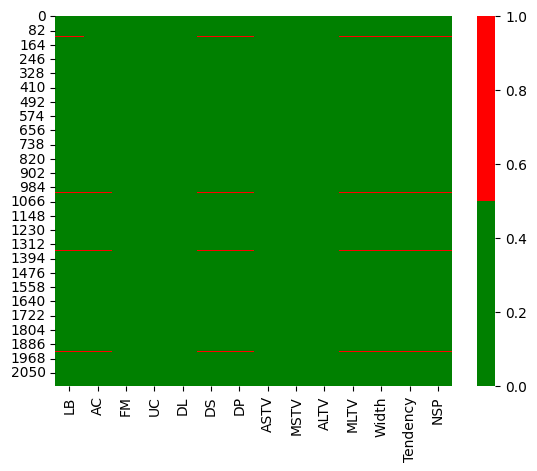

In [7]:
#Plot the heat map to check yhe null values in each column
import seaborn as sas
color=['green','red']
sas.heatmap(Cardio.isnull(),cmap=sas.color_palette(color))

In [8]:
#Checking the skeweness wether we have to replace it with the mean orr median
Nul_Columns=['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
for i in Nul_Columns:
  sk=Cardio[Nul_Columns].skew()
  print(sk)

#hence the value are more thane 0.30 we have to replace the null with median
  me=Cardio[Nul_Columns].median()
  print(me)
  break


LB          0.320747
AC          2.016787
DS          8.418984
DP          6.422466
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64
LB          133.000000
AC            0.001634
DS            0.000000
DP            0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [9]:
Cardio['LB_C']=Cardio['LB'].fillna(Cardio['LB'].median())
Cardio['AC_C']=Cardio['AC'].fillna(Cardio['AC'].median())
Cardio['DS_C']=Cardio['DS'].fillna(Cardio['DS'].median())
Cardio['DP_C']=Cardio['DP'].fillna(Cardio['DP'].median())
Cardio['MLTV_C']=Cardio['MLTV'].fillna(Cardio['MLTV'].median())
Cardio['Width_C']=Cardio['Width'].fillna(Cardio['Width'].median())
Cardio['Tendency_C']=Cardio['Tendency'].fillna(Cardio['Tendency'].median())
Cardio['NSP_C']=Cardio['NSP'].fillna(Cardio['NSP'].median())

In [10]:
Cardio

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Tendency,NSP,LB_C,AC_C,DS_C,DP_C,MLTV_C,Width_C,Tendency_C,NSP_C
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,...,0.999926,2.000000,120.000000,0.000000,0.0,0.0,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,...,0.000000,1.000000,132.000000,0.006380,0.0,0.0,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,...,0.000000,1.000000,133.000000,0.003322,0.0,0.0,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,...,1.000000,1.000000,134.000000,0.002561,0.0,0.0,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,...,1.000000,1.000000,131.948232,0.006515,0.0,0.0,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,...,0.000000,2.000000,140.000000,0.000000,0.0,0.0,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,...,1.000000,2.000000,140.000000,0.000775,0.0,0.0,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,...,1.000000,1.990464,140.000000,0.000980,0.0,0.0,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,...,1.000000,2.000000,140.000000,0.000679,0.0,0.0,7.0,66.0,1.000000,2.000000


In [11]:
Cardio.drop(['LB','AC','DS','DP','MLTV','Width','Tendency','NSP'],axis=1,inplace=True)

In [12]:
Cardio.isnull().sum()

,0
FM,0
UC,0
DL,0
ASTV,0
MSTV,0
ALTV,0
LB_C,0
AC_C,0
DS_C,0
DP_C,0


In [13]:
Cardio[0:4]

,FM,UC,DL,ASTV,MSTV,ALTV,LB_C,AC_C,DS_C,DP_C,MLTV_C,Width_C,Tendency_C,NSP_C
0,0.0,0.000000,0.000000,73.0,0.5,43.0,120.0,0.000000,0.0,0.0,2.4,64.0,0.999926,2.0
1,0.0,0.006380,0.003190,17.0,2.1,0.0,132.0,0.006380,0.0,0.0,10.4,130.0,0.000000,1.0
2,0.0,0.008306,0.003322,16.0,2.1,0.0,133.0,0.003322,0.0,0.0,13.4,130.0,0.000000,1.0
3,0.0,0.007742,0.002561,16.0,2.4,0.0,134.0,0.002561,0.0,0.0,23.0,117.0,1.000000,1.0


Detction of the Outlier

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'LB_C'),
  Text(1, 0, 'AC_C'),
  Text(2, 0, 'DS_C'),
  Text(3, 0, 'DP_C'),
  Text(4, 0, 'MLTV_C'),
  Text(5, 0, 'Width_C'),
  Text(6, 0, 'Tendency_C'),
  Text(7, 0, 'NSP_C'),
  Text(8, 0, 'FM'),
  Text(9, 0, 'UC'),
  Text(10, 0, 'DL'),
  Text(11, 0, 'ASTV'),
  Text(12, 0, 'MSTV'),
  Text(13, 0, 'ALTV')])

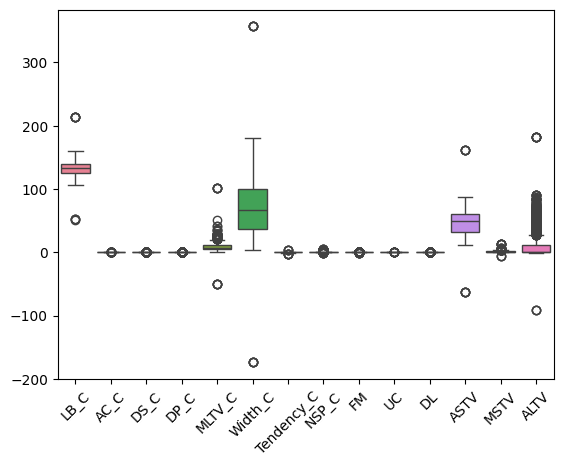

In [14]:
Outlir=['LB_C','AC_C','DS_C','DP_C','MLTV_C','Width_C','Tendency_C','NSP_C','FM','UC','DL','ASTV','MSTV','ALTV']
sas.boxplot(Cardio[Outlir])
plt.xticks(rotation=45)

In [15]:
from functools import update_wrapper
Nu_Col=['LB_C','AC_C','DS_C','DP_C','MLTV_C','Width_C','Tendency_C','NSP_C','FM','UC','DL','ASTV','MSTV','ALTV']
for colmn in Nu_Col:
 Q1=Cardio[Nu_Col].quantile(0.25)
 print('the value for the quartile 1 is:',Q1)
 Q2=Cardio[Nu_Col].quantile(0.50)
 print('the value for the quartile 2 is:',Q2)
 Q3=Cardio[Nu_Col].quantile(0.75)
 print('the value for the quartile 3 is:',Q3)
# Calculate the interquatile
 IQR=Q3-Q1
 print('the inter quartile is:',IQR)
#Now Calculate the upperlimite and Lower Limit
 Upper_Limit=Q3+(1.5*IQR)
 print('the upper limit is:',Upper_Limit)
 Lower_Limit=Q2-(1.5*IQR)
 print('the lower limit is:',Lower_Limit)
 break
 #Now replace the outlier of the respective column with upper limit and lower limit
 Cardio[Nu_Col]=np.where(Cardio[Nu_Col]>Upper_Limit,Upper_Limit,np.where(Cardio[Nu_Col]<Lower_Limit,Lower_Limit,Cardio[Nu_Col]))

the value for the quartile 1 is: LB_C          126.000000
AC_C            0.000000
DS_C            0.000000
DP_C            0.000000
MLTV_C          4.600000
Width_C        37.000000
Tendency_C      0.000000
NSP_C           1.000000
FM              0.000000
UC              0.001851
DL              0.000000
ASTV           32.000000
MSTV            0.700000
ALTV            0.000000
Name: 0.25, dtype: float64
the value for the quartile 2 is: LB_C          133.000000
AC_C            0.001634
DS_C            0.000000
DP_C            0.000000
MLTV_C          7.400000
Width_C        67.000000
Tendency_C      0.000000
NSP_C           1.000000
FM              0.000000
UC              0.004484
DL              0.000000
ASTV           49.000000
MSTV            1.200000
ALTV            0.000000
Name: 0.5, dtype: float64
the value for the quartile 3 is: LB_C          140.000000
AC_C            0.005606
DS_C            0.000000
DP_C            0.000000
MLTV_C         10.800000
Width_C       100.00000

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'FM'),
  Text(2, 0, 'UC'),
  Text(3, 0, 'DL'),
  Text(4, 0, 'ASTV'),
  Text(5, 0, 'MSTV'),
  Text(6, 0, 'ALTV'),
  Text(7, 0, 'LB_C'),
  Text(8, 0, 'AC_C'),
  Text(9, 0, 'DS_C'),
  Text(10, 0, 'DP_C'),
  Text(11, 0, 'MLTV_C'),
  Text(12, 0, 'Width_C'),
  Text(13, 0, 'Tendency_C'),
  Text(14, 0, 'NSP_C')])

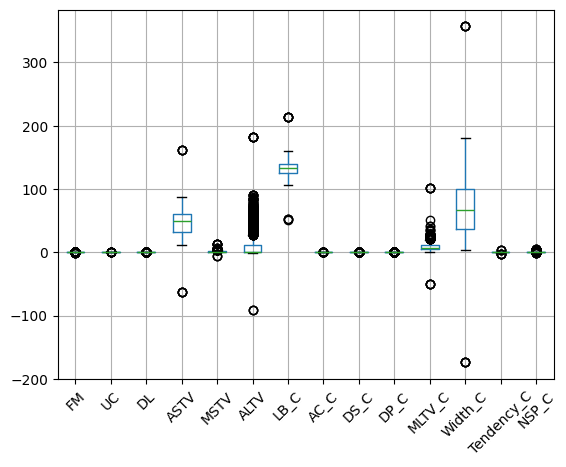

In [16]:
Cardio.boxplot()
plt.xticks(rotation=45)

Determining the relation between the columns

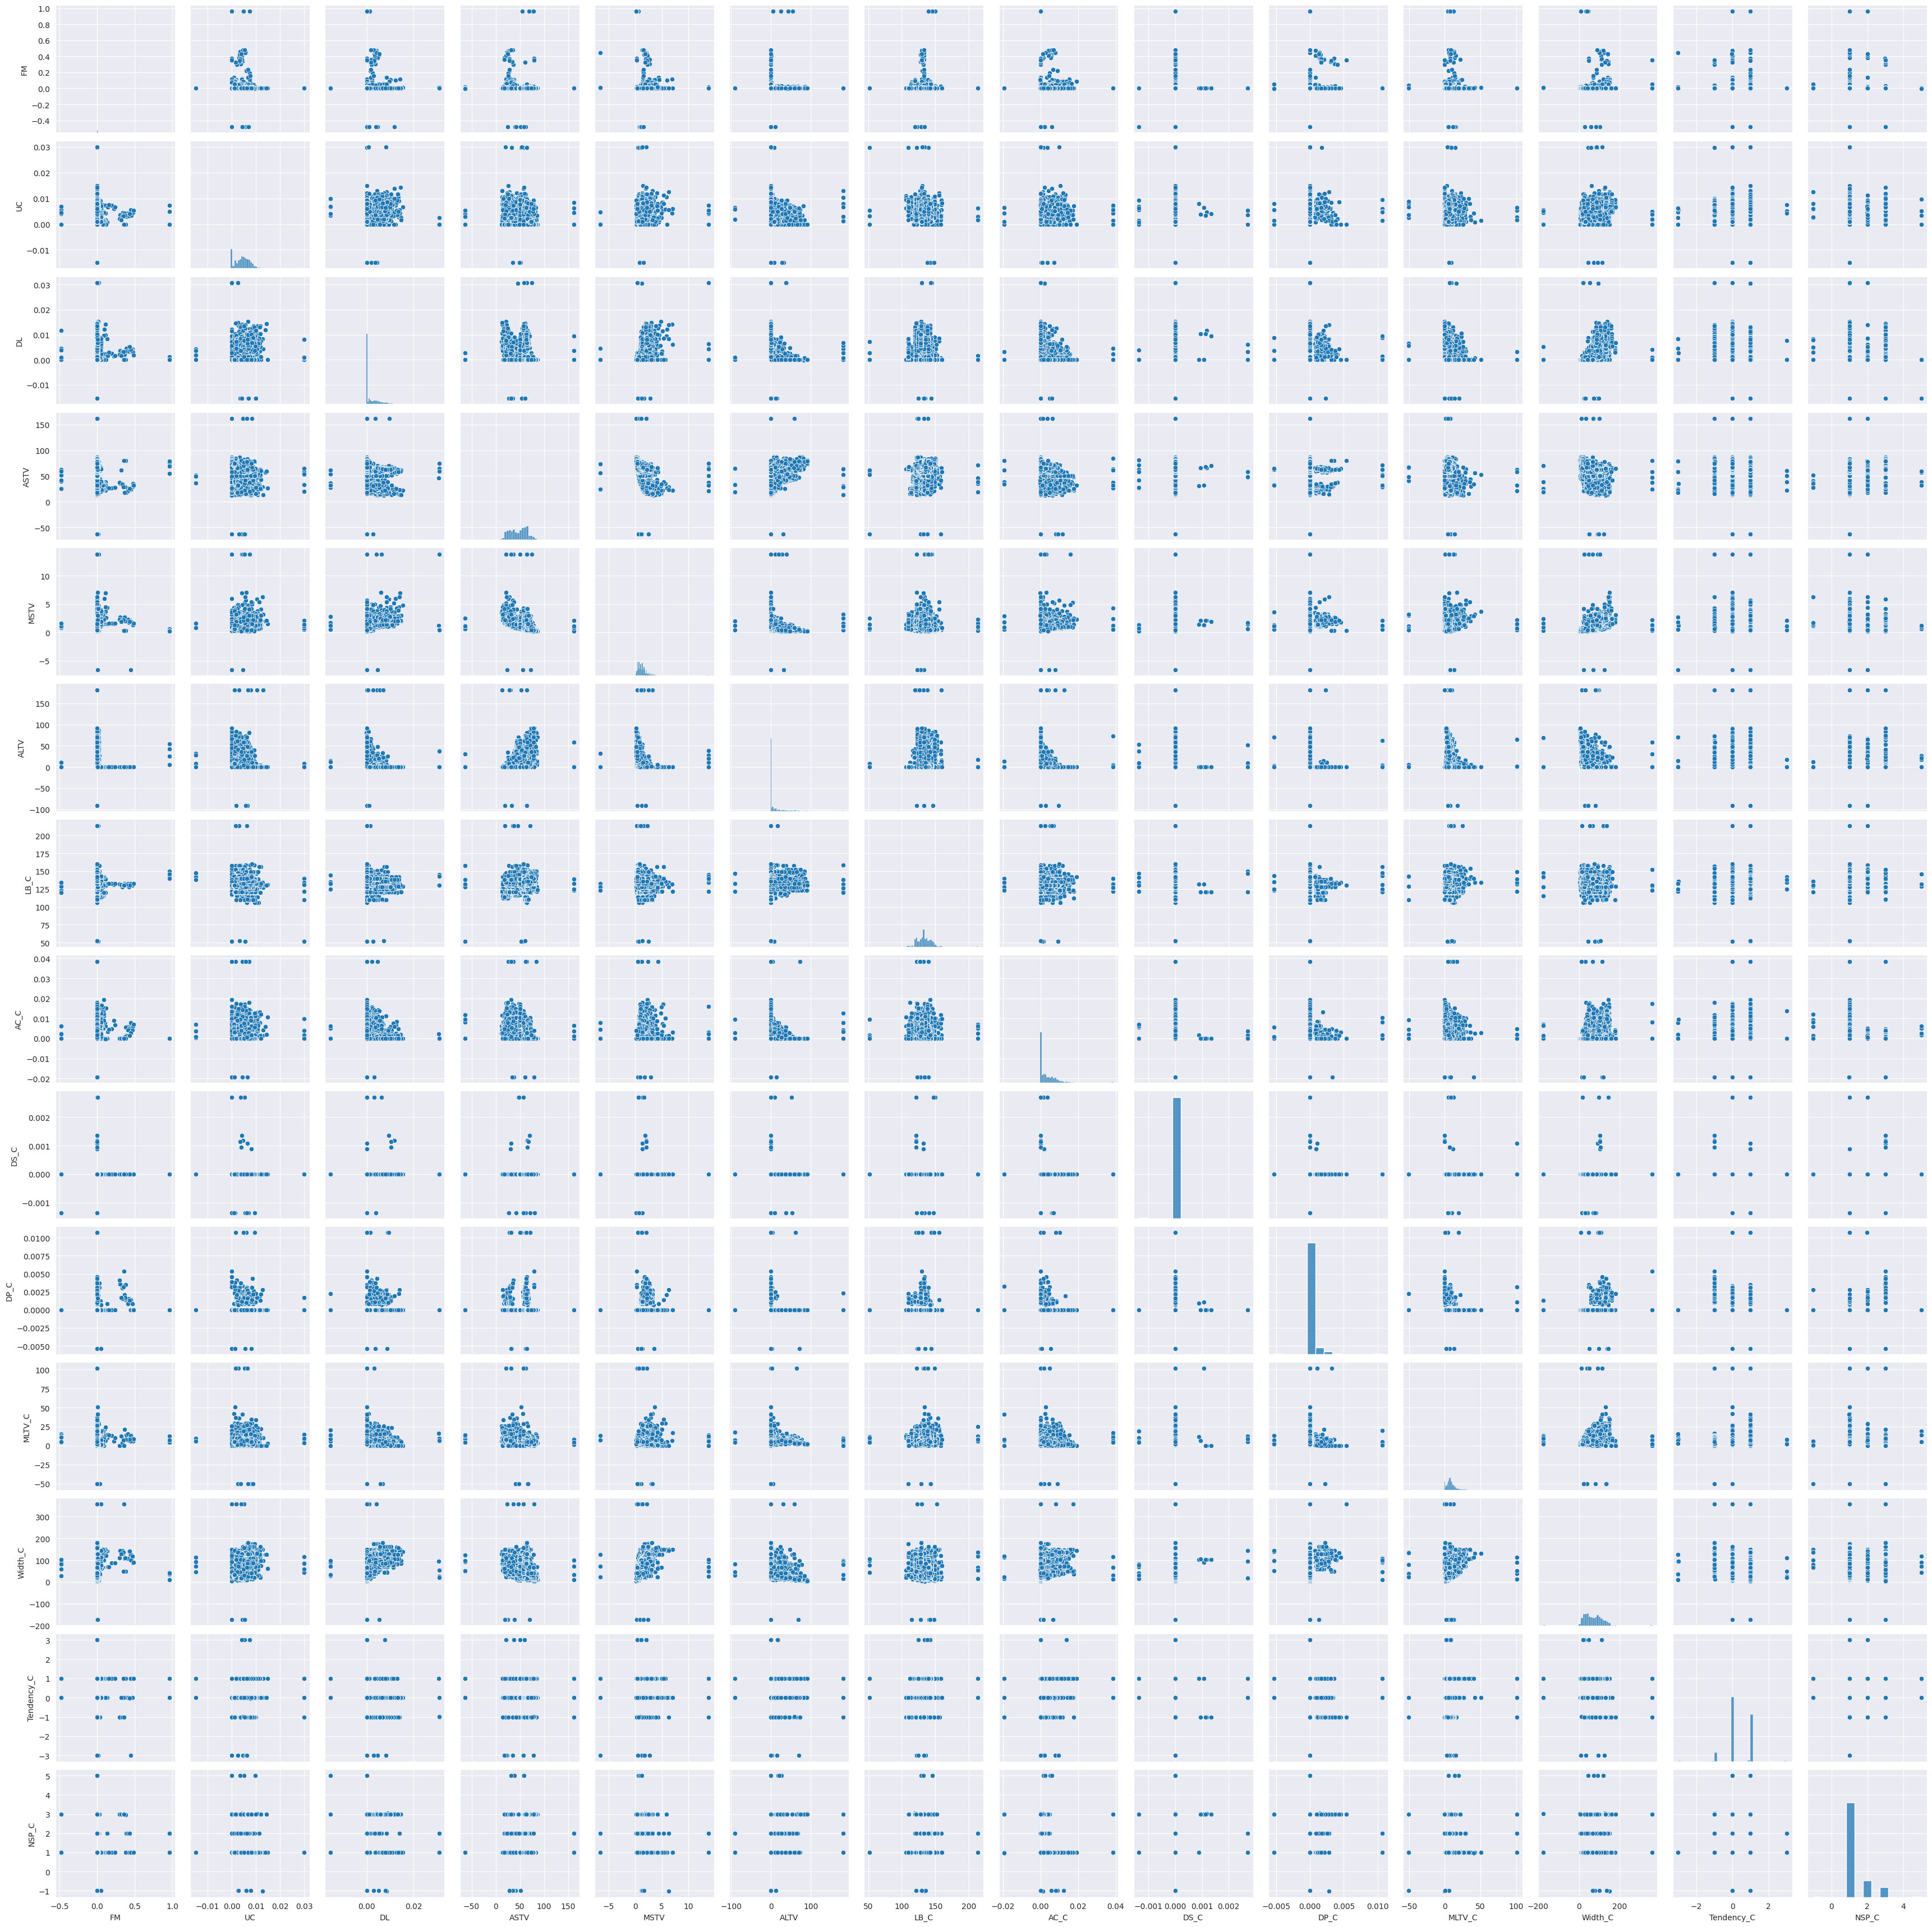

In [17]:
#Pair Plor
sas.set_style(style='darkgrid')
sas.pairplot(Cardio)

In [18]:
Cardio.corr()

,FM,UC,DL,ASTV,MSTV,ALTV,LB_C,AC_C,DS_C,DP_C,MLTV_C,Width_C,Tendency_C,NSP_C
FM,1.000000,-0.053226,0.009718,-0.032691,0.017055,-0.011936,0.018807,0.009768,0.029916,0.121459,-0.006121,0.097282,-0.017819,0.074446
UC,-0.053226,1.000000,0.190128,-0.181161,0.189406,-0.227304,-0.166229,0.071621,-0.006938,0.070295,-0.049452,0.107083,-0.066832,-0.185229
DL,0.009718,0.190128,1.000000,-0.069361,0.410102,-0.186967,-0.126563,-0.093449,0.058413,0.144717,-0.165293,0.408578,-0.023914,0.024879
ASTV,-0.032691,-0.181161,-0.069361,1.000000,-0.293882,0.357497,0.241857,-0.230470,0.008426,0.038119,-0.219709,-0.206931,-0.010855,0.420873
MSTV,0.017055,0.189406,0.410102,-0.293882,1.000000,-0.291935,-0.169647,0.132962,0.016026,0.118628,0.028452,0.432822,-0.038017,-0.095876
ALTV,-0.011936,-0.227304,-0.186967,0.357497,-0.291935,1.000000,0.210542,-0.269807,-0.004335,-0.076975,-0.107200,-0.345732,0.038234,0.366454
LB_C,0.018807,-0.166229,-0.126563,0.241857,-0.169647,0.210542,1.000000,-0.062813,-0.005432,-0.047650,-0.003423,-0.118397,0.236730,0.131839
AC_C,0.009768,0.071621,-0.093449,-0.230470,0.132962,-0.269807,-0.062813,1.000000,-0.033088,-0.083298,-0.104853,0.234549,0.031710,-0.311689
DS_C,0.029916,-0.006938,0.058413,0.008426,0.016026,-0.004335,-0.005432,-0.033088,1.000000,0.004321,0.034367,0.040845,-0.015294,0.065411
DP_C,0.121459,0.070295,0.144717,0.038119,0.118628,-0.076975,-0.047650,-0.083298,0.004321,1.000000,-0.113818,0.175462,-0.129204,0.295057


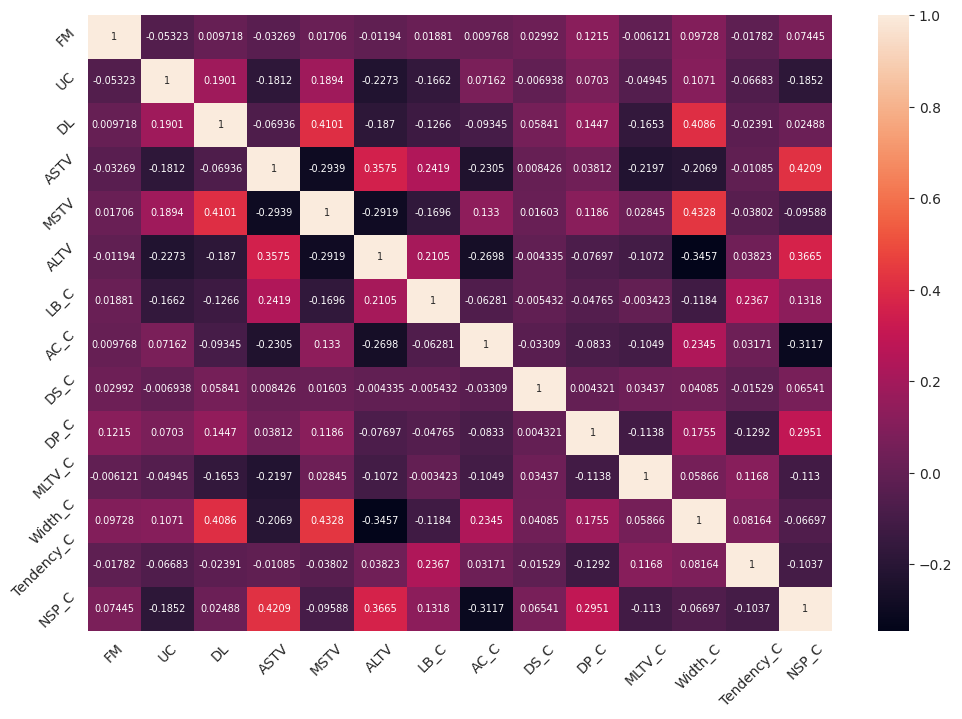

In [30]:
#Corellation Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size BEFORE plotting
plt.figure(figsize=(12, 8), dpi=100)  # Adjust width and height

# Generate the heatmap with proper annotation size
sns.heatmap(Cardio.corr(), annot=True, fmt=".4g", annot_kws={"size": 7})

# Rotate labels for better visibility (if needed)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


The High Corelation is between the MSTV and Width_C which is followed by the ALTV and NSP_C ,MSTV and DL.We can perform yhe linear refression and Clustering technique for this Data